In [17]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
)
from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from IPython.display import clear_output
from amftrack.pipeline.functions.post_processing.exp_plot import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from time import time_ns
import os
from random import choice
from PIL import Image
from typing import List

from amftrack.util.dbx import upload
from amftrack.util.sys import temp_path
from amftrack.util.aliases import coord
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    plot_hulls_skelet,
    plot_full,
    reconstruct_image_from_general,
    plot_edge_color_value,
)
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    get_anastomosing_hyphae,
)
from matplotlib import cm

from amftrack.pipeline.functions.post_processing.area_hulls import is_in_study_zone
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    load_skel,
    Node,
)
from amftrack.pipeline.functions.post_processing.area_hulls import (
    get_regular_hulls_area_fixed,get_regular_hulls
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plates = ["1045_20220504","1048_20220506","52_20220707"]
directory_targ = directory_project
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/3345 [00:00<?, ?it/s]

In [3]:
folders = all_folders.loc[all_folders["unique_id"]=='52_20220707']
folders = folders.sort_values(by="datetime")
folders = folders.iloc[0:42]

exp = Experiment(directory_targ)
exp.load(folders)
exp.dates.sort()
for t in range(len(folders)):
    exp.load_tile_information(t)
exp.save_location = "/".join(path_exp.split("/")[:-1])
load_study_zone(exp)    

2022-07-07 14:58:00
2022-07-07 17:15:00
2022-07-07 19:15:00
2022-07-07 21:15:00
2022-07-07 23:15:00
2022-07-08 01:15:00
2022-07-08 03:15:00
2022-07-08 05:15:00
2022-07-08 07:15:00
2022-07-08 09:15:00
2022-07-08 11:15:00
2022-07-08 13:50:00
2022-07-08 15:50:00
2022-07-08 17:50:00
2022-07-08 19:50:00
2022-07-08 21:50:00
2022-07-08 23:50:00
2022-07-09 01:50:00
2022-07-09 03:50:00
2022-07-09 05:50:00
2022-07-09 07:50:00
2022-07-09 09:50:00
2022-07-09 11:50:00
2022-07-09 13:50:00
2022-07-09 15:50:00
2022-07-09 17:50:00
2022-07-09 19:50:00
2022-07-09 21:50:00
2022-07-09 23:50:00
2022-07-10 01:50:00
2022-07-10 03:50:00
2022-07-10 05:50:00
2022-07-10 07:50:00
2022-07-10 09:50:00
2022-07-10 11:50:00
2022-07-10 13:51:00
2022-07-10 15:50:00
2022-07-10 17:50:00
2022-07-10 19:50:00
2022-07-10 21:50:00
2022-07-10 23:50:00
2022-07-11 01:50:00


In [16]:
ts = range(exp.ts)
ts

range(0, 42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 2 24784737.0
1 2 27583676.5
2 3 31473567.5
3 2 34654630.0
4 2 38707267.5
5 2 42581459.0
6 2 45537273.5
7 3 50118966.0
8 3 54303355.0
9 2 58444661.5
10 2 63706309.5
11 3 68448159.5
12 3 74915690.5
13 3 80835217.0
14 3 87086201.5
15 3 93667864.0
16 4 100766883.5
17 3 108548838.5
18 3 117916783.5
19 4 127703620.98476273
20 4 136140552.80097955
21 3 145776209.239049
22 3 159812359.5
23 2 167713153.0
24 3 176236325.5
25 2 186134810.0
26 2 195072550.0
27 2 203168462.0
28 2 220113888.0
29 3 230643748.5
30 3 242968753.5
31 3 253588405.42980674
32 3 263123882.5508308
33 3 272699773.70660365
34 3 285113096.5
35 2 296535532.0
36 3 307309429.5
37 2 319480813.5
38 2 331047964.5
39 2 343375155.5
40 3 355771986.5
41 2 368884449.5


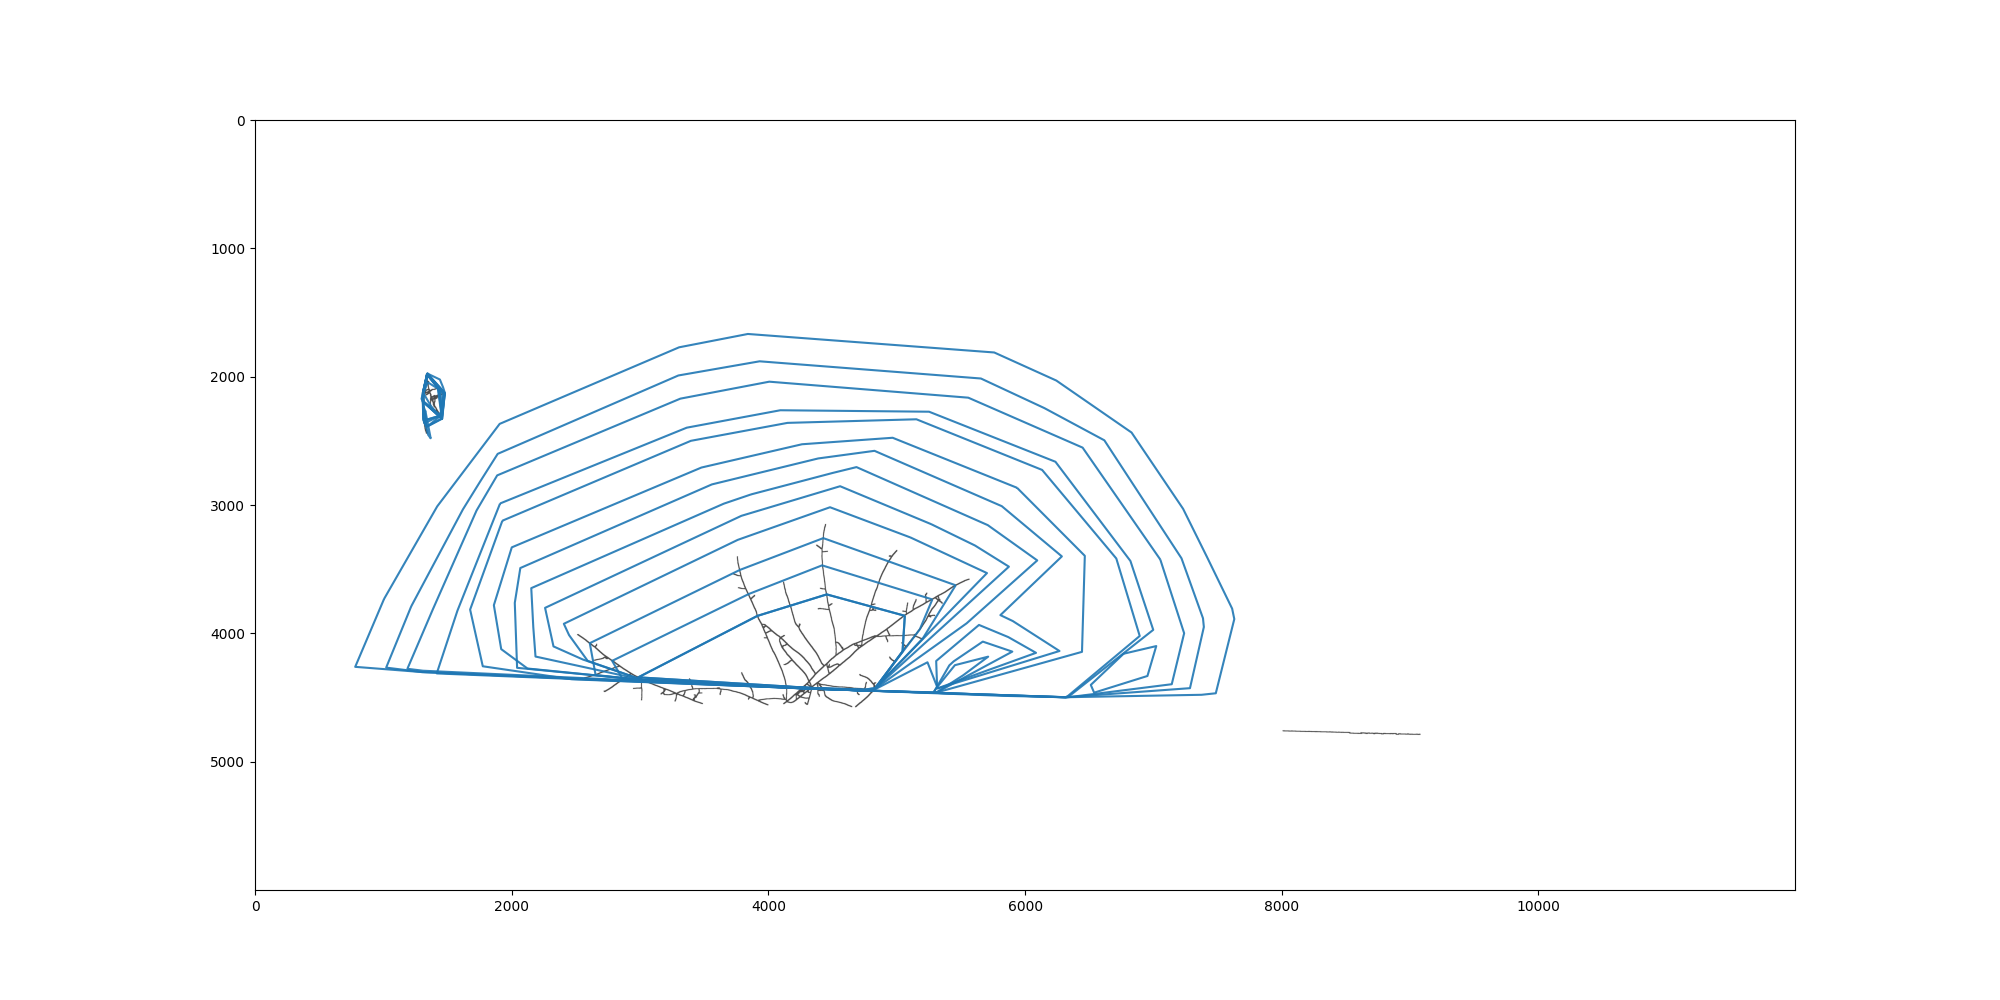

In [26]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.functions.post_processing.area_hulls import (
    get_regular_hulls_area_fixed,get_regular_hulls
)
incr = 2
ts = range(exp.ts)

regular_hulls, indexes = get_regular_hulls(exp, ts, incr)
plot_hulls_skelet(exp, 10, regular_hulls)
